<a href="https://colab.research.google.com/github/hhemesat/MAT-421/blob/main/ModuleBPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lagrange Polynomial Interpolation

---



In [ ]:
import random
x = random.sample(range(1,5),3)
y = random.sample(range(1,5),3)
print(x)
print(y)

[2, 4, 3]
[1, 2, 3]


Let us take x = [2,4,3] and y= [1,2,3]

Then P1(x) = (x-x2)(x-x3)/(x1-x2)(x1-x3) = (x-4)(x-3)/(-2)(-1) = (1/2)(x-4)(x-3)

P2(x) = (x-x1)(x-x3)/(x2-x1)(x2-x3) = (x-2)(x-3)/(2)(1) = (1/2)(x-2)(x-3)

P3(x) = (x-x1)(x-x2)/(x3-x2)(x3-x1) = (x-2)(x-4)/(1)(-1) = -(x-2)(x-4)

We verify that P1(x1) = P1(2) = 1/2(2-4)(2-3) = 1, and P1(x2) = P1(x3) = 0

Then P1 coefficients = [6,-7/2, 1/2]

P2 coefficients = [3,-5/2, 1/2]

P3 coefficients = [-8,6, -1]

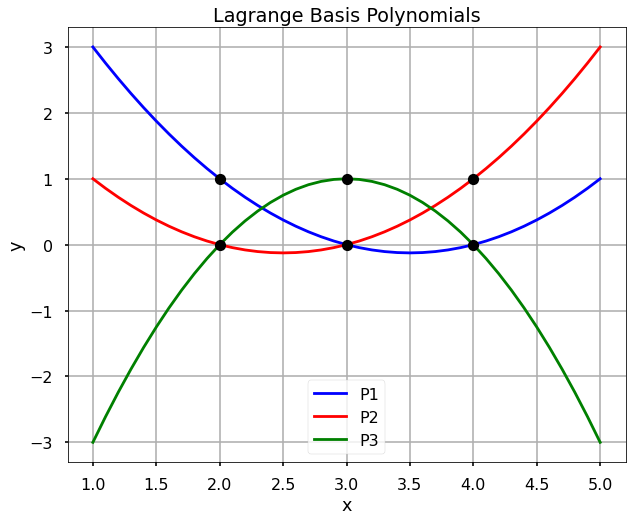

In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
x = [2,4,3]
y = [1,2,3]
P1_coeff = [6,-3.5,0.5]
P2_coeff = [3, -2.5,0.5]
P3_coeff = [-8,6,-1]
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(1,5.1,0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Now we verify that the Lagrange polynomial goes through each of the points by plotting the graph.

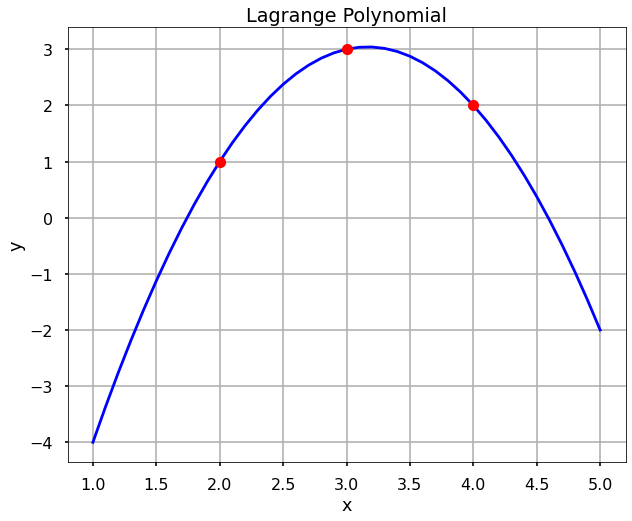

In [ ]:
L = P1 + 2*P2 + 3*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Further verification by using scipy's lagrange function. 

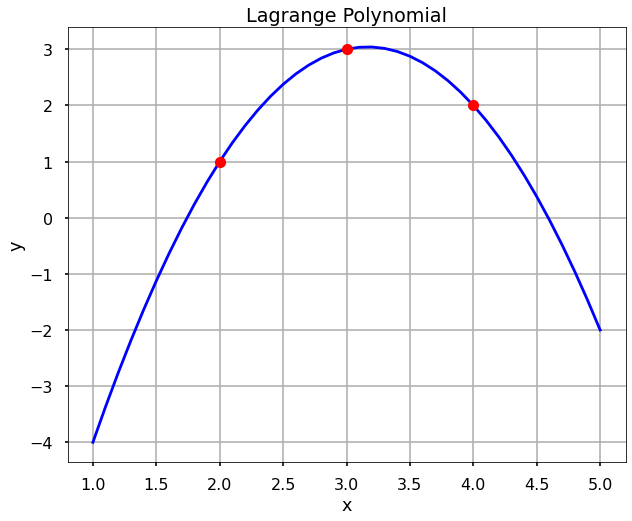

In [ ]:
from scipy.interpolate import lagrange
f = lagrange(x, y)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Newton's Polynomial Interpolation

---



In [2]:
import random
x = random.sample(range(-10,10),4)
y = random.sample(range(-10,10),4)
print(x)
print(y)

[4, 8, 6, -1]
[4, 7, -8, -7]


Let us calculate the divided differences table for x = [4, 8, 6, -1], y = [4, 7, -8, -7].

We first calculate this manually.
a0 = y0 = 4

a1 = (7-4)/(8-4) = 3/4

a2 = ((-8-7)/(6-8) - 3/4)/(6-4) = 27/8

a3 = (((-7+8/(-1-6)-(-8-7)/(6-8)))/(-1-8)-(27/8))/(-1-4) = 1273/2520

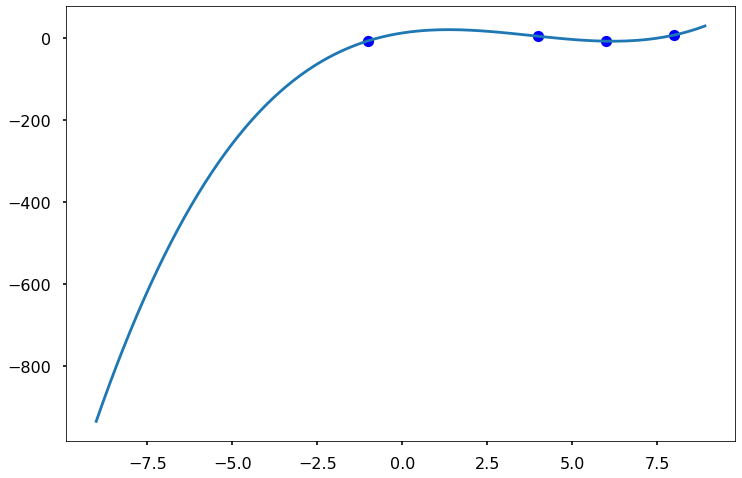

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p
x = np.array([4, 8, 6, -1])
y = np.array([4, 7, -8, -7])
a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-9, 9, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)